# ANALIZA PODATKOV

Analizirali bomo podatke o (vseh) smučiščih v Alpah. Podatke prevzameme iz csv datoteke vsi_podatki.csv, ki je bila ustrvarjena s pomočjo python datoteke podatki.py

Analizirali bomo:
- Povprečja pomembnih podatkov
- Velikost smučišč
- Težavnost smučišč
- Izkoristek žičnic
- Ceno

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
pd.set_option('display.max_rows', 10)
vsi_podatki = pd.read_csv('Podatki/vsi_podatki.csv')
vsi_podatki

,Ime,Država,Spodnja višina [m],Zgornja višina [m],Dolžina prog [km],Dolžina črnih prog [km],Dolžina modrih prog [km],Število žičnic,Cena [€]
0,Spieljoch – Fügen,Avstrija,610,2054,17.1,2.7,3.6,11,77
1,Steinplatte-Winklmoosalm – Waidring/Reit im Winkl,Avstrija,740,1860,42.0,2.0,20.0,14,60
2,St. Jakob im Defereggental – Brunnalm,Avstrija,1400,2683,23.7,6.2,5.0,7,70
3,Biberwier – Marienberg,Avstrija,1000,1820,11.0,0.0,7.3,5,68
4,Zillertal Arena – Zell am Ziller/Gerlos/Königs...,Avstrija,580,2500,150.1,12.0,50.0,52,79
...,...,...,...,...,...,...,...,...,...
1045,Kelchsau,Avstrija,775,780,0.1,0.0,0.1,Ni podatka,Ni podatka
1046,Rettenegg,Avstrija,870,900,0.3,0.0,0.3,Ni podatka,Ni podatka
1047,Belmonte – Treschè Conca,Italija,1055,1070,0.1,0.0,0.1,Ni podatka,Ni podatka
1048,Winterpark Neustift,Avstrija,991,995,0.1,0.0,0.1,Ni podatka,Ni podatka


In [30]:
vsi_podatki['Število žičnic'] = pd.to_numeric(vsi_podatki['Število žičnic'].replace('Ni podatka', np.nan), errors='coerce')
vsi_podatki['Cena [€]'] = pd.to_numeric(vsi_podatki['Cena [€]'].replace('Ni podatka', np.nan), errors='coerce')

## Analiza po povprečjih

V tem kratkem, ampak pomembnem poglavju bomo dobili občutek kdaj je smučišče "dobro", kdaj lahko rečemo, da je smučišče veliko, kdaj je visoko, kdaj je poceni. Analizirali bomo povprečja dolžine prog, števila žičnic, višine in cene. Podatke bomo razbrali iz škatle z brki.

In [31]:
def škatla_z_brki(stolpec):
    '''Funkcija nariše škatlo z brki za podan stolpec'''
    enote = {'Dolžina prog [km]': 'km', 'Zgornja višina [m]': 'm', 'Število žičnic': '', 'Cena [€]': '€'}
    podatki = vsi_podatki[stolpec].dropna()
    povprečje = int(podatki.mean())
    enota = enote.get(stolpec, '')

    fig, ax = plt.subplots(figsize=(8, 2))
    ax.boxplot(podatki, vert=False, patch_artist=True, boxprops=dict(facecolor='#DDEEFF'), medianprops=dict(color="#1D5252"))

    ax.axvline(povprečje, color='red', linestyle='--', label=f'Povprečje: {povprečje} {enota}')

    ax.get_yaxis().set_visible(False)

    ax.set_title(f'Škatla z brki: {stolpec}', fontsize=14)
    ax.set_xlabel(stolpec, fontsize=12)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

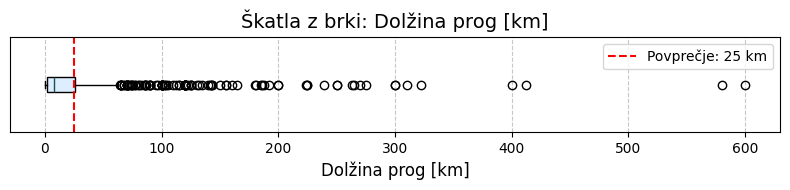

In [32]:
škatla_z_brki('Dolžina prog [km]')

Povprečna dolžina prog je 25 km.

Okoli tri četrtine smučišč ima dolžino prog manjšo od 25 km, vendar so nekatera smučišča tako ogormna, da povprečje dvignejo na 25 km.

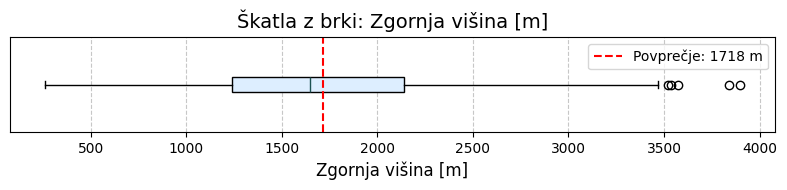

In [33]:
škatla_z_brki('Zgornja višina [m]')

Povprečna zgornja višina je 1719m.

Podatki so bolj normalno razporejeni kot pri dolžini prog, vendar je razlika med najnižjim in najvišjim okoli 3500m, kar je ogromno.

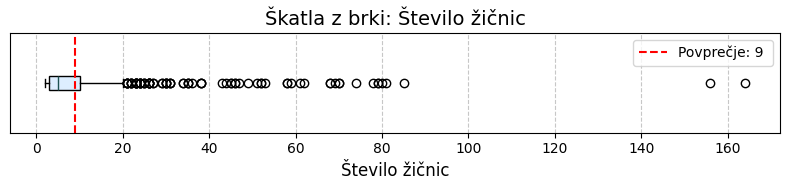

In [34]:
škatla_z_brki('Število žičnic')

Povprečno število žičnic je 9.

Škatla z brki izgleda podobno kot za dolžino prog, kar bi lahko pričakovali glede na to, da če imamo več prog, potrebujemo več žičnic.

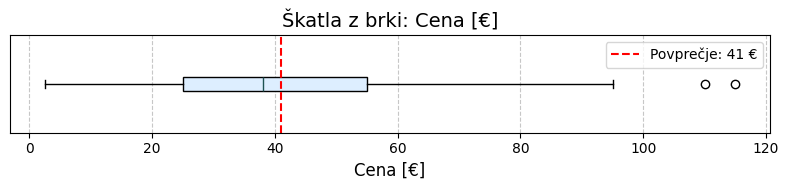

In [35]:
škatla_z_brki('Cena [€]')

Povprečna cena smučišč je 41 €

Preverimo, če obstaja kakšno slovensko smučišče, ki je v vseh štirih kriterijih nadpovprečen.

In [36]:
nadpovprečno_slovensko = vsi_podatki.copy()

rezultat = nadpovprečno_slovensko[
    (nadpovprečno_slovensko['Država'] == 'Slovenija') &
    (nadpovprečno_slovensko['Zgornja višina [m]'] >= 1719) &
    (nadpovprečno_slovensko['Dolžina prog [km]'] >= 25) &
    (nadpovprečno_slovensko['Število žičnic'] >= 9) &
    (nadpovprečno_slovensko['Cena [€]'] <= 41)
]

if rezultat.empty:
    print("Ne obstaja")
else:
    print(rezultat[['Smučišče', 'Zgornja višina [m]', 'Dolžina prog [km]', 'Število žičnic', 'Cena [€]']])

Ne obstaja


## Analiza po velikosti smučišč

Velikost smučišča lahko opišemo z naslednjima pomembnima podatkoma:
1) Dolžina vseh prog
2) Število  žičnic

Ostala kriterija, ki določata vellikost smučišča pa sta tudi:

3) Višinska razlika med spodnjo in zgornjo višino
4) Zgornja višina

Za začetek bi radi ugotovili, katere države v Alpah imajo največ smučišč. Pričakujemo na prvem mestu Avstrijo, velik del Alp pokriva tudi Francijo, Italijo ter Švico, zato tudi za te države pričakujemo, da imajo veliko smučišč. Po drugi strani za Slovenijo, Nemčijo in Lihtenštajn predvidevamo, da imajo manj smučišč, saj Alpe pokrivajo le majhen del površja teh držav.

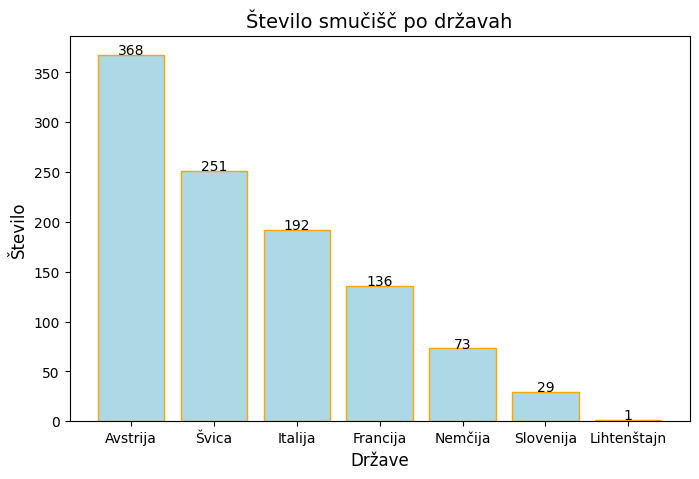

In [37]:
število_smučišč = vsi_podatki['Država'].value_counts().reset_index()

število_smučišč.columns = ['Država','Število smučišč']

plt.figure(figsize=(8,5))

x_labels = število_smučišč['Država'].astype(str).tolist()
y_values = število_smučišč['Število smučišč'].tolist()

plt.bar(x_labels, y_values, color="lightblue", edgecolor="orange")

plt.title("Število smučišč po državah", fontsize=14)
plt.xlabel("Države", fontsize=12)
plt.ylabel("Število", fontsize=12)

for i, val in enumerate(y_values):
    plt.text(i, val + 0.5, str(val), ha='center', fontsize=10)

plt.show()

Iz grafa očitno sledi, da je hipoteza potrjena. Presenetljivo je to, da ima Švica več smučišč kot Italija ali Francija, saj je 27% Alp v Italiji, 21% v Franciji, medtem ko je v Švici le 13% Alp. (Podatke o deležu sem dobil iz https://en.wikipedia.org/wiki/Alps)

Iz zgornje ugotovitve lahko zato sklepamo, da so v Italiji in Franciji večja smučišča po skupni dolžini prog kot v ostalih državah. Poglejmo še povprečno dolžino prog in povprečno število žičnic za posamezno državo.

Ker je v Lihtenštajnu le eno smučišče, ga bom pri nadaljni analizi izločil.

In [38]:
države_dolžina = vsi_podatki.groupby('Država')['Dolžina prog [km]'].mean().round(1).reset_index()
države_dolžina.columns = ['Država', 'Povprečna dolžina prog [km]']
države_dolžina.sort_values('Povprečna dolžina prog [km]', ascending=False, inplace=True)
izloči_lihtenštajn = države_dolžina['Država'] != 'Lihtenštajn'
države_dolžina = države_dolžina[izloči_lihtenštajn]

države_žičnice = vsi_podatki[['Država', 'Število žičnic']].copy()
države_žičnice = (
    države_žičnice[države_žičnice["Država"] != "Lihtenštajn"]
    .groupby("Država")["Število žičnic"]
    .mean()
    .round()
    .reset_index()
)
države_žičnice.columns = ['Država', 'Povprečno število žičnic']
države_žičnice['Povprečno število žičnic'] = države_žičnice['Povprečno število žičnic'].astype(int)

države_dolžina.merge(države_žičnice, on='Država')

,Država,Povprečna dolžina prog [km],Povprečno število žičnic
0,Francija,55.3,16
1,Švica,26.0,8
2,Italija,23.5,9
3,Avstrija,19.7,9
4,Slovenija,8.1,6
5,Nemčija,7.9,6


Ugotovimo, da ima Francija res neprimerljivo največja smučišča (tako glede na dolžino, kot tudi na število žičnic), ima več kot dvakrat večja smučišča od katerekoli druge države. Vidimo pa tudi, da predpostavka, da ima Italija večja smučišča kot Švica ne drži. V Avstriji so manjša smučišča.

Poglejmo še katerih je 10 največjih smučišč glede na skupno dolžino prog

In [39]:
višinske_razlike = vsi_podatki['Zgornja višina [m]'] - vsi_podatki['Spodnja višina [m]']
tabela_velikosti = vsi_podatki[['Ime', 'Država', 'Dolžina prog [km]', 'Število žičnic', 'Zgornja višina [m]', 'Cena [€]']].copy()
tabela_velikosti['Višinska razlika [m]'] = višinske_razlike
tabela_velikosti.sort_values('Dolžina prog [km]', ascending=False, inplace=True)
tabela_velikosti_25 = tabela_velikosti.head(25)[['Ime', 'Država', 'Dolžina prog [km]', 'Število žičnic', 'Zgornja višina [m]', 'Višinska razlika [m]', 'Cena [€]']]
tabela_velikosti_25['Število žičnic'] = tabela_velikosti_25['Število žičnic'].astype(int)
tabela_velikosti_25

,Ime,Država,Dolžina prog [km],Število žičnic,Zgornja višina [m],Višinska razlika [m],Cena [€]
69,Les 3 Vallées – Val Thorens/Les Menuires/Mérib...,Francija,600.0,156,3230,2130,81.8
89,Les Portes du Soleil – Morzine/Avoriaz/Les Get...,Švica,580.0,164,2254,1269,70.0
83,4 Vallées – Verbier/La Tzoumaz/Nendaz/Veysonna...,Švica,412.0,68,3330,1980,95.0
93,Via Lattea – Sestriere/Sauze d’Oulx/San Sicari...,Italija,400.0,70,2789,1251,63.0
71,Zermatt/Breuil-Cervinia/Valtournenche – Matter...,Švica,322.0,51,3899,2337,110.0
...,...,...,...,...,...,...,...
117,Espace Diamant – Les Saisies/Notre-Dame-de-Bel...,Francija,192.0,80,2069,1069,49.0
36,KitzSki – Kitzbühel/Kirchberg,Avstrija,188.0,58,2000,1200,79.5
63,Serfaus-Fiss-Ladis,Avstrija,186.0,38,2828,1628,74.0
141,Vars/Risoul – La Forêt Blanche,Francija,185.0,34,2750,1100,55.0


Vidimo, da ima smučišče Les 3 Vallées največjo dolžino vseh prog, ki meri neverjetnih 600 km. Za primerjavo, 600 km je razdalja med Ljubljano in Prago.

Med temi 25 največjimi želimo poiskati še tisto smučišče, ki:
1) Ima največ žičnic
2) Doseže najvišjo točko
3) Leži na največji višinski razliki
4) Ima najbolj ugodno ceno


In [40]:
najvec_zicnic = tabela_velikosti_25.loc[tabela_velikosti_25['Število žičnic'].idxmax()]
najvisja_tocka = tabela_velikosti_25.loc[tabela_velikosti_25['Zgornja višina [m]'].idxmax()]
najvecja_visinska_razlika = tabela_velikosti_25.loc[tabela_velikosti_25['Višinska razlika [m]'].idxmax()]
najugodnejse = tabela_velikosti_25.loc[tabela_velikosti_25['Cena [€]'].idxmin()]

print(f'{najvec_zicnic['Ime']} ({int(najvec_zicnic['Število žičnic'])} žičnic)')
print(f'{najvisja_tocka['Ime']} (Najvišja točka = {najvisja_tocka['Zgornja višina [m]']} m)')
print(f'{najvecja_visinska_razlika['Ime']} (Višinska razlika = {najvecja_visinska_razlika['Višinska razlika [m]']} m)')
print(f'{najugodnejse['Ime']} (Cena = {najugodnejse['Cena [€]']} €)')

Les Portes du Soleil – Morzine/Avoriaz/Les Gets/Châtel/Morgins/Champéry (164 žičnic)
Zermatt/Breuil-Cervinia/Valtournenche – Matterhorn (Najvišja točka = 3899 m)
Zermatt/Breuil-Cervinia/Valtournenche – Matterhorn (Višinska razlika = 2337 m)
Espace Diamant – Les Saisies/Notre-Dame-de-Bellecombe/Praz sur Arly/Flumet/Crest-Voland (Cena = 49.0 €)


Želimo napisati funkcijo, ki nam za vsako državo vrne ime smučišča z največjo dolžino prog in ime smučišča z največ žičnicami

In [41]:
def največja_smučišča(ime_države):
    '''Funkcija iz podane države poišče 5 največjih smučišč po dolžini prog iz določ in nariše stolpični diagram,
    v isti prikaz nariše tudi število žičnic za posamezno smučišče'''
    podatki = vsi_podatki[vsi_podatki['Država'] == ime_države].copy()

    naj_dolzina = podatki.loc[podatki['Dolžina prog [km]'].idxmax()]
    print(f'{ime_države}:')
    print(f'  - Smučišče z največjo dolžino prog: {naj_dolzina['Ime']} ({naj_dolzina['Dolžina prog [km]']} km)')

    naj_žičnice = podatki.loc[podatki['Število žičnic'].idxmax()]
    print(f'  - Smučišče z največ žičnicami: {naj_žičnice['Ime']} ({int(naj_žičnice['Število žičnic'])} žičnic)')

    največjih_5 = podatki.sort_values('Dolžina prog [km]', ascending=False).head(5)

    if len(največjih_5) < 5:
        print("Premalo podatkov za graf (manj kot 5 smučišč).")
        return

    imena = največjih_5['Ime']
    dolžine = največjih_5['Dolžina prog [km]']
    žičnice = največjih_5['Število žičnic']

    barve =  ['#AEC6CF','#FFDAB9','#E6E6FA','#C1E1C1','#FADADD']

    fig, ax1 = plt.subplots(figsize=(10, 6))

    bars = ax1.bar(range(len(imena)), dolžine, color=barve)
    ax1.set_ylabel('Dolžina prog [km]', color='black')
    ax1.set_title(f'Največjih 5 smučišč v državi {ime_države}')
    ax1.set_xticks(range(len(imena)))
    ax1.set_xticklabels(imena, rotation=45, ha='right')

    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2,
                 height + 0.25,
                 f"{round(height)}",
                 ha='center',
                 va='bottom',
                 fontsize=8,
                 color = 'gray')

    ax2 = ax1.twinx()
    ax2.plot(range(len(imena)), žičnice, color='blue', marker='o', linewidth=2, label='Število žičnic')
    ax2.set_ylabel('Število žičnic', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    fig.legend(loc='lower right', bbox_to_anchor=(0.1, 0.95))
    plt.tight_layout()
    plt.show()

Preverimo katere podatke nam funkcija izpiše za Slovenijo

Slovenija:
  - Smučišče z največjo dolžino prog: Mariborsko Pohorje – Maribor (35.0 km)
  - Smučišče z največ žičnicami: Kranjska Gora (15 žičnic)


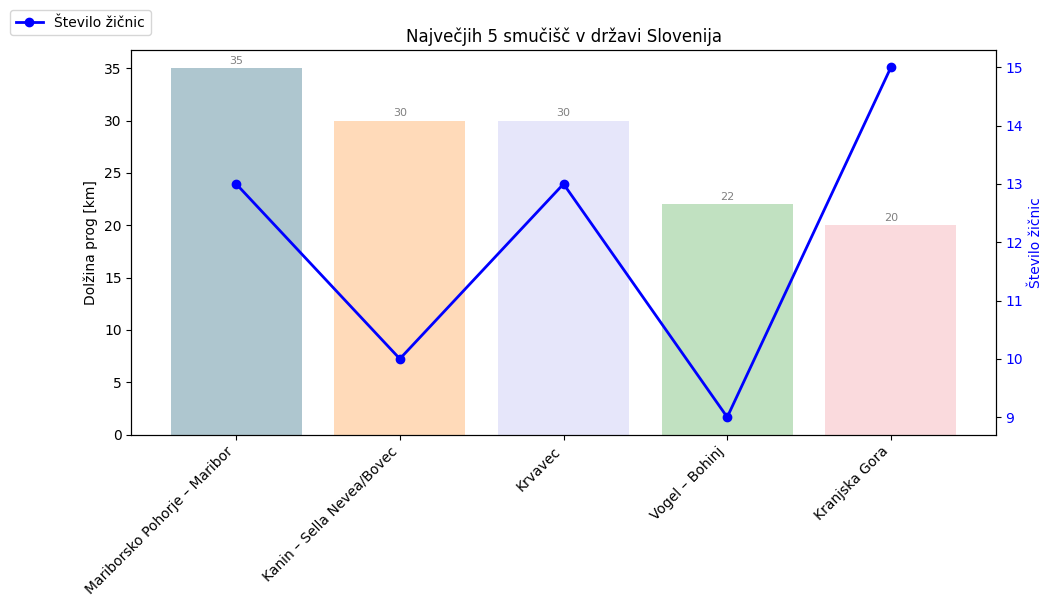

In [42]:
največja_smučišča('Slovenija')

## Analiza po težavnosti smučišča

Težavnost smučišča bi bilo smiselno določiti po strmini smučišča.
Vemo, da je črna proga najstrmejša, modra najpoložnejša, rdeča pa nekaj vmes. Na težavnost bi tudi vplivala nadmorska višina, saj je zrak redkejši, zato se tudi utrudimo hitreje, vendar pa se razlika pozna šele nad 3000m nadmorske višine.

Pogeljmo naprej, katere države imajo v povprečju bolj strma smučišča. Glede na to, da so Alpe višje na zahodu na mejah med Švico, Italijo in Francijo (tam so tudi nekatere najvišje gore v Evropi npr. Mont Blanc, Matterhorn, Gran Paradiso, ...) lahko sklepamo, da so tam tudi bolj strma smučišča. V Sloveniji in Nemčiji pa bi bila glede na predpostavko smučišča položnejša.

Opazovali bomo tudi, kako je nadmorska višina smučišča povezana s strmino, lahko predvidevamo, da bo strmina naraščala z višino

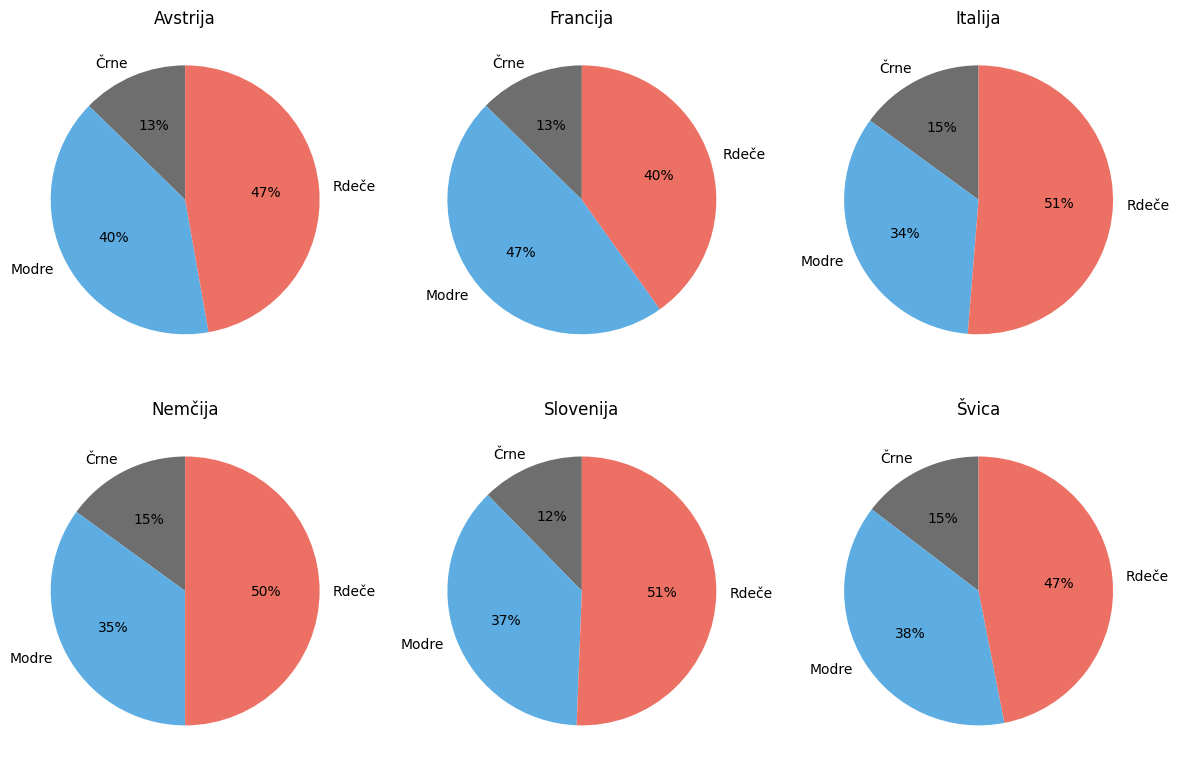

In [43]:
podatki_brez_lihtenštajn = vsi_podatki[vsi_podatki['Država'] != 'Lihtenštajn'].copy()

proge = podatki_brez_lihtenštajn.groupby('Država')[[
    'Dolžina prog [km]',
    'Dolžina črnih prog [km]',
    'Dolžina modrih prog [km]'
]].mean().reset_index()
proge['Dolžina rdečih prog [km]'] = proge['Dolžina prog [km]'] - proge['Dolžina črnih prog [km]'] - proge['Dolžina modrih prog [km]']
proge = proge.round(1)

barve = ['#6E6E6E', '#5DADE2', '#EC7063']

fig, axes = plt.subplots(2, 3, figsize=(3 * 4, 2 * 4))

for (i, row) in proge.iterrows():
    ax = axes[i // 3, i % 3]
    vrednosti = [
        row['Dolžina črnih prog [km]'],
        row['Dolžina modrih prog [km]'],
        row['Dolžina rdečih prog [km]']
    ]
    labels = ['Črne', 'Modre', 'Rdeče']
    ax.pie(vrednosti, labels=labels, colors=barve, autopct='%1.0f%%', startangle=90, textprops={'color': 'black'})
    ax.set_title(row['Država'])

plt.tight_layout()
plt.show()


Vidimo, imata Švica in Italija in Nemčija zanemarljivo malo večji delež črnih prog kot ostale države. Tudi delež rdečih in modrih je pri vseh državah zelo podoben. Torej je strmina smučišč neodvisna od države, oziroma dela Alp, v katerem je smučišče postavljeno, pa čeprav so zahodne alpe višje od Vzhodnih. Predpostavko lahko ovržemo. Tudi o težavnosti smučišč glede na države nismo izvedeli nič.

Pogledali bomo še tabelo smučišč z največjimi deleži črnih prog in opazovali povprečno višino in zgornjo višino.

In [44]:
strmine = vsi_podatki.dropna(subset=['Ime', 'Dolžina prog [km]', 'Dolžina črnih prog [km]', 'Zgornja višina [m]']).copy()

strmine['Delež črnih prog [%]'] = (
    strmine['Dolžina črnih prog [km]'] / strmine['Dolžina prog [km]'] * 100
).round()
strmine['Povprečna višina [m]'] = (
    (vsi_podatki['Zgornja višina [m]'] + vsi_podatki['Spodnja višina [m]']) // 2
)

tabela_strmine = strmine[[
    'Ime',
    'Dolžina prog [km]',
    'Dolžina črnih prog [km]',
    'Delež črnih prog [%]',
    'Zgornja višina [m]',
    'Povprečna višina [m]'
]]

tabela_strmine = tabela_strmine.sort_values('Delež črnih prog [%]', ascending=False).reset_index(drop=True)

tabela_strmine

,Ime,Dolžina prog [km],Dolžina črnih prog [km],Delež črnih prog [%],Zgornja višina [m],Povprečna višina [m]
0,Laber – Oberammergau,4.0,4.0,100.0,1684,1292
1,Wallberg – Rottach-Egern,3.2,3.2,100.0,1620,1205
2,Baienberg – Reuthe,0.7,0.4,57.0,810,730
3,Gemsstock – Andermatt,31.0,17.0,55.0,2961,2202
4,Kristberg – Silbertal,7.8,4.2,54.0,1589,1239
...,...,...,...,...,...,...
1032,Lochwiesen – Tiefenbach,0.3,0.0,0.0,894,871
1033,Stockerfeldlift Mößna – St. Nikolai im Sölktal...,0.4,0.0,0.0,1096,1048
1034,Hochgallmigg,0.4,0.0,0.0,1480,1422
1035,Lainach (Rangersdorf),0.3,0.0,0.0,950,910


Iz podatkov bomo narisali graf delež črnih prog v odvisnosti od povprečne nadmorske višine in opazovali trend. Tako bomo ugotovili, ali sta višina in strmina sploh povezana

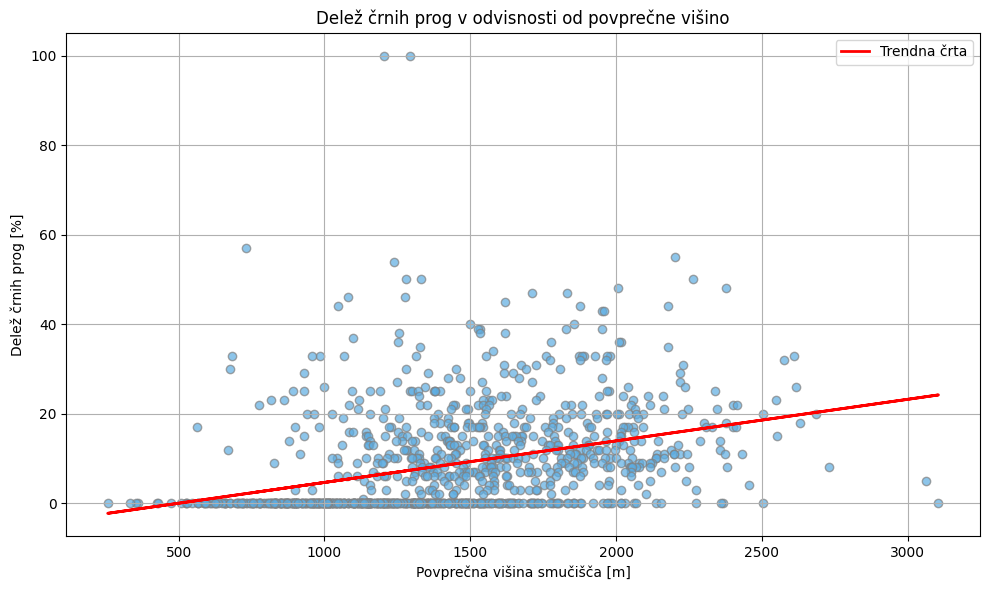

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(
    tabela_strmine['Povprečna višina [m]'],
    tabela_strmine['Delež črnih prog [%]'],
    color='#5DADE2',
    edgecolors='gray',
    alpha=0.7
)

plt.xlabel("Povprečna višina smučišča [m]")
plt.ylabel("Delež črnih prog [%]")
plt.title("Delež črnih prog v odvisnosti od povprečne višino")
plt.grid(True)

x = tabela_strmine['Povprečna višina [m]']
y = tabela_strmine['Delež črnih prog [%]']
koef = np.polyfit(x, y, 1)
trend = np.poly1d(koef)
plt.plot(x, trend(x), color='red', linewidth=2, label='Trendna črta')

plt.legend()
plt.tight_layout()
plt.show()


Iz grafa je jasno razvidno, da delež črnih prog in s tem strmina smučišča narašča z nadmorsko višino. S tem potrjujemo prvotno hipotezo.

Končna ugotovitev:
1) Strmina smučišča ni odvisna od povprečne nadmorske višine tistega dela Alp, v katerem se smučišče nahaja.
2) Strmina narašča z nadmorsko višino gore na kateri je smučišče postavljeno.

## Analiza izkoristka žičnic

V tem poglavju bomo raziskali, katere države in smučišča imajo bolje izkoriščene žičnice, kar nam pove podatek o povprečni dolžini prog na eno žičnico

Zanimivo področje, v katerega bi se lahko poglobili z analizo tega poglavja, je tudi učinkovitost, varčnost in okljska ozaveščenost posameznih držav in smučišč. S tem ko gradimo daljše žičnice ali naredimo več prog okoli ene žičnice, porabimo bistveno manj energije in materiala kot, če zgradimo dve manjši žičnici za isto dolžino prog.

Ker imajo manjša smučišča večino kratke vlečnice (sidra, krožci), bomo opazovali smučišča, ki imajo skupno dožino prog vsaj 10 km.

In [46]:
razdalja_žičnica = vsi_podatki.dropna(subset=['Ime', 'Država', 'Dolžina prog [km]', 'Število žičnic']).copy()
razdalja_žičnica['Dolžina proge na žičnico [km]'] = (
    razdalja_žičnica['Dolžina prog [km]'] / razdalja_žičnica['Število žičnic']
).round(1)
razdalja_žičnica = razdalja_žičnica[['Ime', 'Država', 'Dolžina prog [km]', 'Število žičnic', 'Dolžina proge na žičnico [km]']]
razdalja_žičnica = razdalja_žičnica.sort_values('Dolžina proge na žičnico [km]', ascending=False).reset_index(drop=True)
razdalja_žičnica['Število žičnic'] = razdalja_žičnica['Število žičnic'].astype(int)
razdalja_žičnica = razdalja_žičnica[razdalja_žičnica['Dolžina prog [km]'] >= 10]
razdalja_žičnica

,Ime,Država,Dolžina prog [km],Število žičnic,Dolžina proge na žičnico [km]
0,Corvatsch/Furtschellas,Švica,120.0,14,8.6
1,Sampeyre,Italija,17.2,2,8.6
2,Auron (Saint-Etienne-de-Tinée),Francija,135.0,16,8.4
3,Rothwald/Wasenalp (Simplon Pass),Švica,25.0,3,8.3
4,Espace Super Saint-Bernard – Bourg-St-Pierre,Švica,25.0,3,8.3
...,...,...,...,...,...
597,Kranjska Gora,Slovenija,20.0,15,1.3
627,Font d'Urle – Chaud Clapier,Francija,12.0,11,1.1
630,Piancavallo,Italija,13.3,12,1.1
634,Thollon les Mémises,Francija,17.0,15,1.1


Vidimo, da je izkoristek žičnic od smučišča Sempeyre veliko večji od izkoristka Rogle. 17 km prog je postavljeno le okoli dveh žičnic, medtem ko jih ima rogla 12 za le 12 km prog. Je pa res, da se bomo verjetno hitreje naveličali smučati v Sempeyre kot v Rogli, saj Rogla z 12 žičnicami nudi tudi večjo raznolikost, kar naredi smučanje zanimivejše.

Poglejmo, katere države imajo najboljši izkoristek žičnic. Predvidevamo lahko, da bodo države, ki imajo večja smučišča (Francija, Švica, Italija) imele tudi boljši izkoristek, medtem ko je povprečna dolžina prog v Avstriji, Sloveniji in Nemčiji manjša.

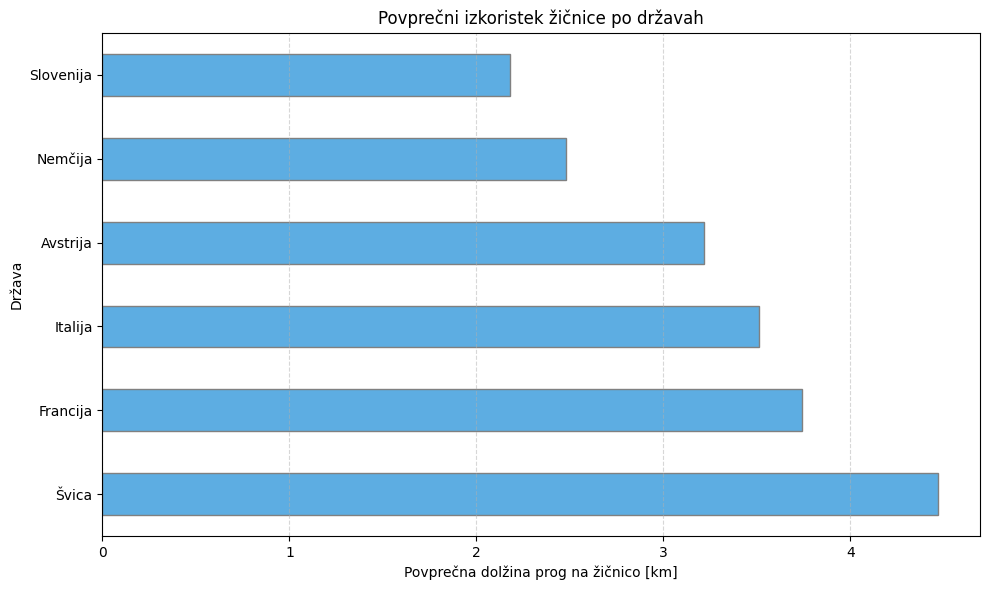

In [47]:
razdalja_žičnica = razdalja_žičnica[razdalja_žičnica['Država'] != 'Lihtenštajn']
povprečje_po_državah = (
    razdalja_žičnica.groupby('Država')['Dolžina proge na žičnico [km]']
    .mean()
    .round(2)
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))
povprečje_po_državah.plot(kind='barh', color='#5DADE2', edgecolor='gray')

plt.xlabel("Povprečna dolžina prog na žičnico [km]")
plt.ylabel("Država")
plt.title("Povprečni izkoristek žičnice po državah")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Tabela nam pokaže, da je naša predpostavka pravila.

Vidimo, da je Švica najbolje izkoristila svoje žičnice in je posledično tudi ekološko najbolj odgovorna.
Po drugi strani pa ima Slovenija presenetljivo slab izkoristek svojih žičnic, kar pa je verjetno tudi posledica lastnosti slovenskih gor.

## Analiza cene

Cena karte je ena najpomembnejših podatkov, ko se odločamo za obisk smučišča. 
Prvo bomo pregledali povprečne cene smučišč po državah in poiskali najcenejše in najdražje opcije.
Nato bomo pa preverili od česa je cena smučišča najbolj odvisna, od države, od dolžine prog ali od števila žičnic.

Pričakujemo lahko, da bo najdražja država Švica, najcenejša pa Slovenija. 

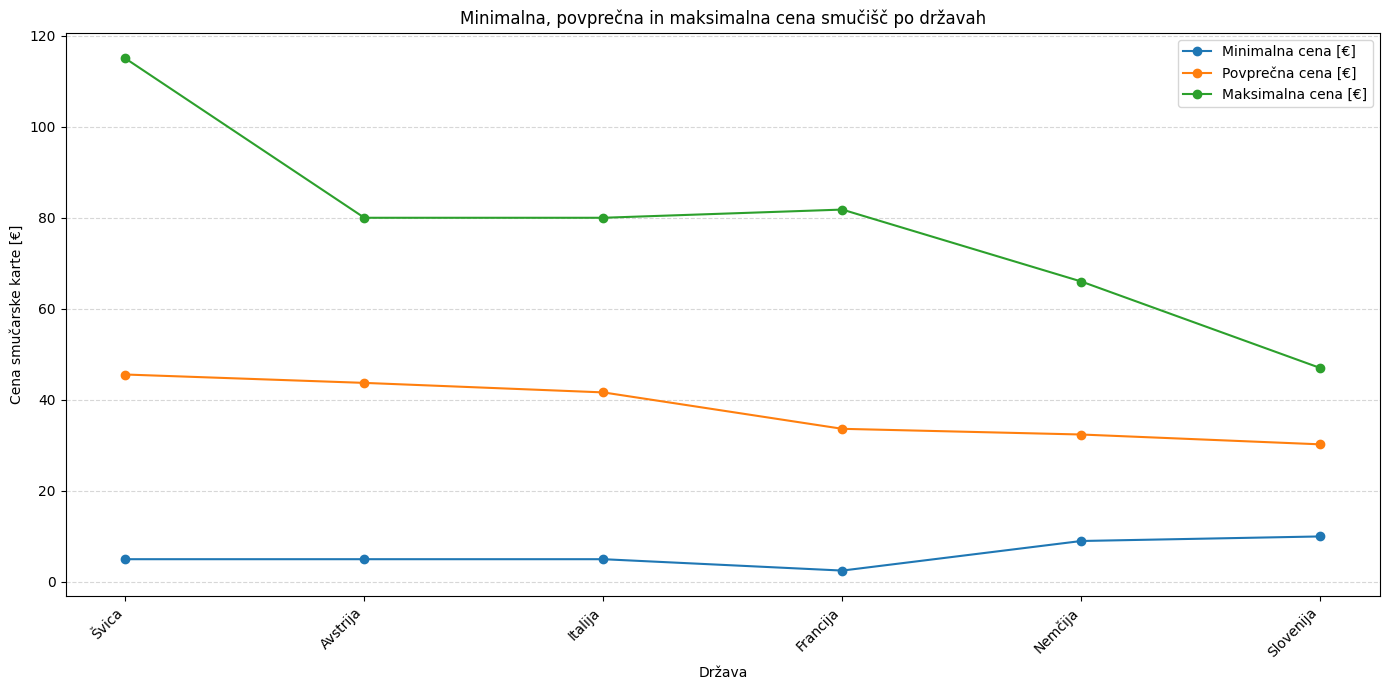

In [48]:
cene_države = podatki_brez_lihtenštajn.groupby('Država')['Cena [€]'].agg([
    ('Minimalna cena [€]', 'min'),
    ('Povprečna cena [€]', lambda x: round(np.mean(x), 2)),
    ('Maksimalna cena [€]', 'max')
]).reset_index().copy()

cene_države = cene_države.sort_values('Povprečna cena [€]', ascending=False)

plt.figure(figsize=(14, 7))
plt.plot(cene_države['Država'], cene_države['Minimalna cena [€]'], marker='o', label='Minimalna cena [€]')
plt.plot(cene_države['Država'], cene_države['Povprečna cena [€]'], marker='o', label='Povprečna cena [€]')
plt.plot(cene_države['Država'], cene_države['Maksimalna cena [€]'], marker='o', label='Maksimalna cena [€]')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Država')
plt.ylabel('Cena smučarske karte [€]')
plt.title('Minimalna, povprečna in maksimalna cena smučišč po državah')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


Vidimo, da je Švica res najdražja, maksimalna cena pa izrazito izstopa od ostalih Držav. Morda je zanimivo, da je Francija šele na četrtem mestu, glede na to, da ima največja smučišča izmed vseh držav.

Poglejmo še katera so najdražja in katera najcenejša smučišča.

In [49]:
tabela_cen = podatki_brez_lihtenštajn[['Ime', 'Država', 'Cena [€]', 'Dolžina prog [km]']].dropna()
tabela_cen = tabela_cen.sort_values('Cena [€]', ascending=False).reset_index(drop=True)
tabela_cen

,Ime,Država,Cena [€],Dolžina prog [km]
0,Laax/Flims/Falera,Švica,115.0,224.0
1,Zermatt/Breuil-Cervinia/Valtournenche – Matter...,Švica,110.0,322.0
2,Andermatt/Oberalp/Sedrun,Švica,95.0,70.0
3,Gemsstock – Andermatt,Švica,95.0,31.0
4,Arosa Lenzerheide,Švica,95.0,225.0
...,...,...,...,...
873,Hütten – Bizau,Avstrija,6.0,0.3
874,Zugerberg,Švica,5.0,0.2
875,Winterwichtelland Sillian,Avstrija,5.0,0.1
876,Balme di Lanzo,Italija,5.0,0.3


Očitno je, da je prvih pet najdražjih smučišč v Švici. Vidimo, da je cena enodnevne karte v Laax/Films/Falera pretiranih 115€. Po drugi strani pa je karta za Notre_Dame-de-Vaulx le 2,5 €.

Ugotovili bomo od česa je cena karte bolj odvisna, od dolžinse prog ali število žičnic. Sumili bi lahko, da je cena bolj odvisna od števila žičnic, saj je za gradnjo in vzdrževanje žičnic potrebno porabiti veliko denarja.

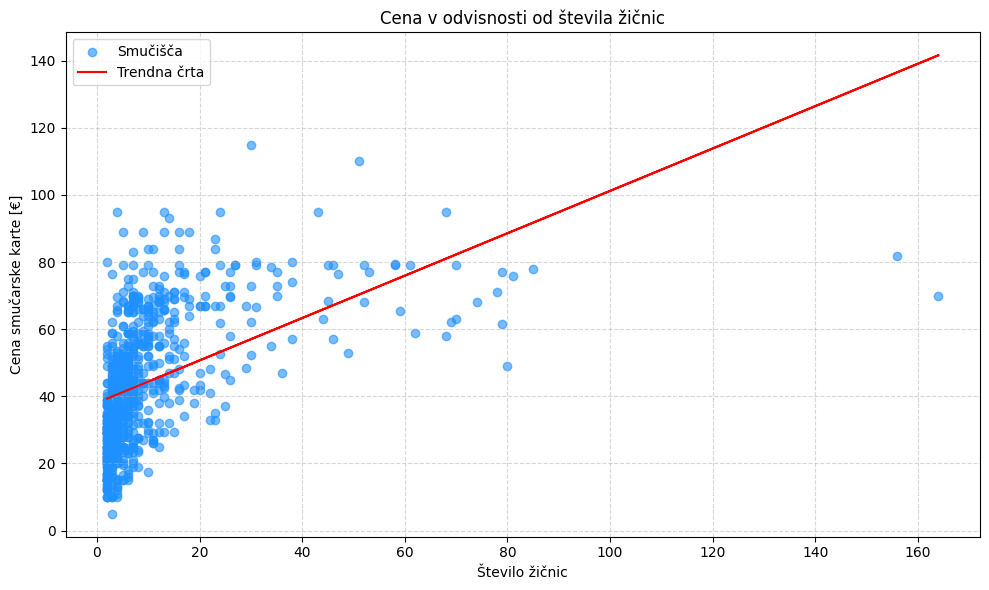

In [50]:
cena_žičnice = vsi_podatki.dropna(subset=['Cena [€]', 'Število žičnic'])

plt.figure(figsize=(10, 6))
plt.scatter(cena_žičnice['Število žičnic'], cena_žičnice['Cena [€]'], color='dodgerblue', alpha=0.6, label='Smučišča')

naklon1 = np.polyfit(cena_žičnice['Število žičnic'], cena_žičnice['Cena [€]'], 1)
premica1 = np.poly1d(naklon1)
plt.plot(cena_žičnice['Število žičnic'], premica1(cena_žičnice['Število žičnic']), color='red', label='Trendna črta')

plt.xlabel('Število žičnic')
plt.ylabel('Cena smučarske karte [€]')
plt.title('Cena v odvisnosti od števila žičnic')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

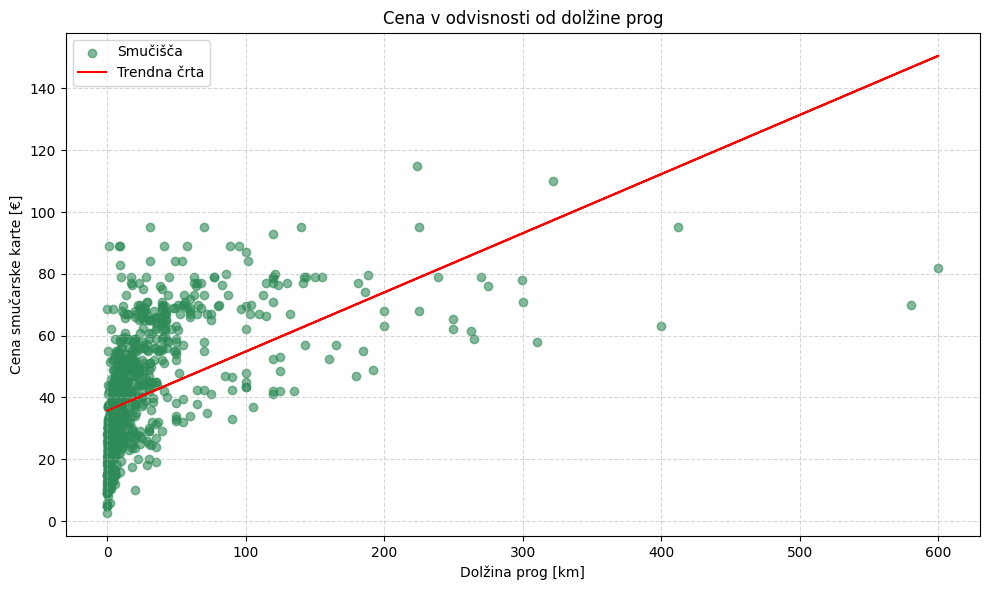

In [51]:
cena_dolžina = podatki_brez_lihtenštajn.dropna(subset=['Cena [€]', 'Dolžina prog [km]'])

plt.figure(figsize=(10, 6))
plt.scatter(cena_dolžina['Dolžina prog [km]'], cena_dolžina['Cena [€]'], color='seagreen', alpha=0.6, label='Smučišča')

naklon2 = np.polyfit(cena_dolžina['Dolžina prog [km]'], cena_dolžina['Cena [€]'], 1)
premica2 = np.poly1d(naklon2)
plt.plot(cena_dolžina['Dolžina prog [km]'], premica2(cena_dolžina['Dolžina prog [km]']), color='red', label='Trendna črta')

plt.xlabel('Dolžina prog [km]')
plt.ylabel('Cena smučarske karte [€]')
plt.title('Cena v odvisnosti od dolžine prog')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Izmerili bomo moč povezave število žičnic in cene ter dolžine prog in cene.

In [52]:
cena_proge = vsi_podatki.dropna(subset=['Cena [€]', 'Dolžina prog [km]'])
odvisnost_žičnice = cena_žičnice['Število žičnic'].corr(cena_žičnice['Cena [€]'])
odvisnost_dolžina = cena_proge['Dolžina prog [km]'].corr(cena_proge['Cena [€]'])

print('Odvisnost cene od števila žičnic:', round(odvisnost_žičnice, 3))
print('Odvisnost cene od dolžine prog:', round(odvisnost_dolžina, 3))

Odvisnost cene od števila žičnic: 0.481
Odvisnost cene od dolžine prog: 0.532


Vidimo, da sta obe trendni črte zelo podobnega naklona, vendar pa je moč povezave z dolžino prog (0,535) malo večja od moči povezave z številom žičnic (0,482), torej cena bolj narašča v odvisnosti od dolžine prog, kar pa je v nasprotju z našo domnevo, da je cena bolj odvisna od števila žičnic.

Za konec bi radi napisali funkcijo, ki nam glede na naše zahteve za velikost, državo in zgornjo višino smučišča poišče najcenejšo možnost.

In [53]:
def najdi_najcenejše_smučišče(država=None, dolžina=None, višina=None):
    '''Iz danih kriterijev funkcija poišče najcenejše smučišče, ki ustreza kriterijem'''
    pomembni = vsi_podatki[['Ime', 'Država', 'Dolžina prog [km]', 'Število žičnic', 'Zgornja višina [m]', 'Cena [€]']].copy()
    pomembni = pomembni.dropna(subset=['Cena [€]'])

    if država:
        pomembni = pomembni[pomembni['Država'] == država]
    if dolžina:
        pomembni = pomembni[pomembni['Dolžina prog [km]'] >= dolžina]
    if višina:
        pomembni = pomembni[pomembni['Zgornja višina [m]'] >= višina]
    if pomembni.empty:
        print('Ni smučišča s temi lastnostmi')
        return
    
    najcenejše = pomembni.loc[pomembni['Cena [€]'].idxmin()]

    print('Najcenejše smučišče glede na podane kriterije:')
    print(f'- Ime: {najcenejše.get("Ime")}')
    print(f'- Država: {najcenejše.get("Država")}')
    print(f'- Cena: {najcenejše.get("Cena [€]")} €')
    print(f'- Dolžina prog: {najcenejše.get("Dolžina prog [km]")} km')
    žičnice = najcenejše.get('Število žičnic')
    if pd.notna(žičnice):
        print(f'- Število žičnic: {int(round(žičnice))}')
    else:
        print('- Število žičnic: Ni podatka')
    print(f'- Zgornja višina: {najcenejše.get("Zgornja višina [m]")} m')

S pomočjo funkcije poiščimo eno "dobro" smučišče v Sloveniji.

In [54]:
najdi_najcenejše_smučišče(država='Slovenija', dolžina=25, višina=2000)

Najcenejše smučišče glede na podane kriterije:
- Ime: Kanin – Sella Nevea/Bovec
- Država: Slovenija
- Cena: 44.0 €
- Dolžina prog: 30.0 km
- Število žičnic: 10
- Zgornja višina: 2292 m
